# Câu 1:
Cung cấp bộ dữ liệu Ecoli ecoli.csv trong folder đề thi (thông tin chi tiết và dữ liệu cũng có thể download trên https://www.openml.org/d/1011) với 8 features và bảng kết quả run (https://www.openml.org/t/3874) đã được thực hiện để tham khảo.<br>
*Yêu cầu:*<br>
Hãy chọn thuật toán phù hợp để xây dựng model dự đoán một mẫu có binaryClass là positive(“P”) hay negative (“N”). Giải thích lý do tại sao bạn chọn thuật toán này? <br>
Chú ý: Thực hiện tất cả các bước để giải quyết vấn đề này từ tiền xử lý dữ liệu => báo cáo kết quả.

#### Import pandas and plotting library

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Read dataset

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/tuyenhavan/Course_Data/main/ecoli.csv", sep=",")
df.head()

,mcg,gvh,lip,chg,aac,alm1,alm2,binaryClass
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35,P
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44,P
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46,P
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36,P
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35,P


In [3]:
# Check missing data
df.isna().sum() # The dataset has no missing data in all columns

mcg            0
gvh            0
lip            0
chg            0
aac            0
alm1           0
alm2           0
binaryClass    0
dtype: int64

In [4]:
# Encode P=1 and N=0
df=pd.get_dummies(df)
# Reanem the target column
df["target"]=df.binaryClass_P
# Drop redundant columns
df=df.drop(["binaryClass_N", "binaryClass_P"], axis=1)
df.head()

,mcg,gvh,lip,chg,aac,alm1,alm2,target
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35,1
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44,1
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46,1
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36,1
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35,1


### Feature and target splitting

In [5]:
X=df.iloc[:, 0:7]
y=df.target

### Building multple models and select the "best" model

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [9]:
# Create a list storing all six following models
models =[LogisticRegression(), DecisionTreeClassifier(), GaussianNB(), SVC(kernel="linear"), 
         RandomForestClassifier(n_estimators=200),KNeighborsClassifier(n_neighbors=6)]
# Create a empty list to store values from following iterations
container=[]
# Loop over each model and randomly split dataset 10 times
for model in models:
    testScore=[] # Test accuracy 
    trainScore=[]
    absScore=[]
    for i in range(20):
        X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.25, random_state=i)
        model.fit(X_train, y_train)
        modelName=model.__class__.__name__
        y_pred=model.predict(X_test)
        y_train_pred=model.predict(X_train)
        test_score=accuracy_score(y_test,y_pred)
        train_score=accuracy_score(y_train,y_train_pred)
        abs_score=abs(test_score-train_score)
        # Append test_score and train_score, abs_score to testScore, trainScore and absScore
        testScore.append(test_score)
        trainScore.append(train_score)
        absScore.append(abs_score)
    container.append([modelName, np.array(testScore).mean()*100, np.array(trainScore).mean()*100, np.array(absScore).mean()*100])

In [10]:
# Create a dataframe storing model name, train and test accuracy score, etc.
df_score=pd.DataFrame(container, columns=["Model_Name","Test_Score","Train_Score","Train_Test_Difference"])
df_score

,Model_Name,Test_Score,Train_Score,Train_Test_Difference
0,LogisticRegression,95.416667,95.357143,2.480159
1,DecisionTreeClassifier,91.726190,100.000000,8.273810
2,GaussianNB,67.321429,67.242063,4.246032
3,SVC,96.071429,96.190476,2.380952
4,RandomForestClassifier,96.071429,100.000000,3.928571
5,KNeighborsClassifier,96.369048,97.261905,1.884921


- **Comments**: It is noted that although all three classifiers SVC, RandomForest and KNN had higher accuracy than other models, the KNN classifier had the highest accuracy. In addition, the KNN had least difference in accuracy between training and testing which indicated that the model is not overfitted. However, the KNN model may be sensitive to k, and therefore multiple KNN classifers will be constructed to select "best" k and confirm this choice. 

In [11]:
# Build multiple KNN models with k between 1 and 10
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.25, random_state=12)
container=[]
for i in range(2,10):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    y_train_pred=model.predict(X_train)
    test_score=accuracy_score(y_test,y_pred)
    train_score=accuracy_score(y_train, y_train_pred)
    abs_score=abs(test_score-train_score)
    container.append([i,test_score, train_score, abs_score])
df_knn=pd.DataFrame(container, columns=["K","testScore","trainScore","trainTestDifference"])
df_knn

,K,testScore,trainScore,trainTestDifference
0,2,0.928571,0.984127,0.055556
1,3,0.952381,0.980159,0.027778
2,4,0.964286,0.980159,0.015873
3,5,0.976190,0.968254,0.007937
4,6,0.964286,0.976190,0.011905
5,7,0.952381,0.976190,0.023810
6,8,0.952381,0.976190,0.023810
7,9,0.952381,0.972222,0.019841


**remark**: K=5 outperformed all other k in the model while k=4 or 6 can be a good candidate too

- It is noted that there may be some variables are not contributed to the model. Hence, feature selection needs to be done. SelectKBest is used for this exercise.

In [12]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [13]:
bestFeat=SelectKBest(score_func=chi2, k="all")
bestFeat.fit(X,y)

SelectKBest(k='all', score_func=<function chi2 at 0x0000029038829820>)

In [14]:
bestFeat.scores_

array([9.27507939e+00, 4.05815295e+00, 1.20343697e-01, 1.09930659e-03,
       1.03318886e+00, 1.75022468e+01, 5.43886731e+00])

In [19]:
df_feat=pd.DataFrame({"Feature":X.columns,"Score":bestFeat.scores_})
df_feat.sort_values("Score")

,Feature,Score
3,chg,0.001099
2,lip,0.120344
4,aac,1.033189
1,gvh,4.058153
6,alm2,5.438867
0,mcg,9.275079
5,alm1,17.502247


*Noted that three variables lip, chg and aac had the least importance in the SelectKBest*. Rebuilding model with all variables except these three.

## Rebuild KNN models

In [20]:
# Build multiple KNN models with k between 1 and 10

X_new=X[["mcg","gvh","alm1","alm2"]]

X_train, X_test, y_train, y_test=train_test_split(X_new,y, test_size=0.25, random_state=12)
container=[]
for i in range(2,10):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    y_train_pred=model.predict(X_train)
    test_score=accuracy_score(y_test,y_pred)
    train_score=accuracy_score(y_train, y_train_pred)
    abs_score=abs(test_score-train_score)
    container.append([i,test_score, train_score, abs_score])
df_knn=pd.DataFrame(container, columns=["K","testScore","trainScore","trainTestDifference"])
df_knn

,K,testScore,trainScore,trainTestDifference
0,2,0.928571,0.976190,0.047619
1,3,0.952381,0.976190,0.023810
2,4,0.952381,0.972222,0.019841
3,5,0.952381,0.972222,0.019841
4,6,0.964286,0.976190,0.011905
5,7,0.952381,0.972222,0.019841
6,8,0.952381,0.976190,0.023810
7,9,0.952381,0.972222,0.019841


- It is noted that K=6 gives highest accuracy observed for this dataset

## Building a final KNN classification model with K=6

In [23]:
finalKNN=KNeighborsClassifier(n_neighbors=6)
finalKNN.fit(X_train, y_train)
# Make prediction on testset
y_pred=finalKNN.predict(X_test)

In [25]:
# Model Accuracy
overallAccuracy=accuracy_score(y_test,y_pred)*100

print("Overall Accuracy is {:.3} %".format(overallAccuracy))

Overall Accuracy is 96.4 %


In [26]:
# Recall and precision
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        48
           1       0.95      0.97      0.96        36

    accuracy                           0.96        84
   macro avg       0.96      0.97      0.96        84
weighted avg       0.96      0.96      0.96        84



- Both recall and precision had good accuracy. 

### Visualizing the model output

In [31]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [36]:
# Get predicted probability 
y_prob=finalKNN.predict_proba(X_test)
p_prob=y_prob[:,1]
p_prob
fpr, tpr, thresholds=roc_curve(y_test,p_prob)

Text(0, 0.5, 'True Positive Rate')

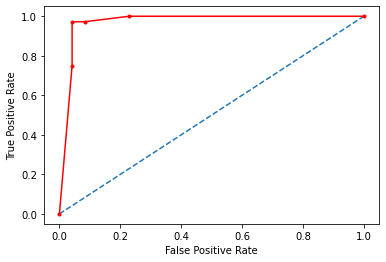

In [37]:
plt.plot([0,1],[0,1], linestyle="--")
plt.plot(fpr,tpr, marker=".", color="r")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [38]:
auc(fpr,tpr) # AUC showed good performance 

0.970775462962963

**Final comment: KNN with k=6 showed the most promissing model for this dataset.**

## **Câu 2:**
### Cung cấp bộ dữ liệu Cholesterol **dataset_2190_cholesterol.csv** trong folder đề thi (thông tin chi tiết và dữ liệu cũng có thể download trên https://www.openml.org/d/204 ) với 14 features và bảng kết quả run (https://www.openml.org/t/2295 ) đo bằng MAE đã được thực hiện để tham khảo.
## Yêu cầu:
### Hãy chọn thuật toán phù hợp để xây dựng model dự đoán **chol** (chỉ số cholesterol). Giải thích lý do tại sao bạn chọn thuật toán này?
#### Chú ý: Thực hiện tất cả các bước để giải quyết vấn đề này từ tiền xử lý dữ liệu => báo cáo kết quả.


#### Read dataset and examine it

In [202]:
df=pd.read_csv("https://raw.githubusercontent.com/tuyenhavan/Course_Data/main/dataset_2190_cholesterol.csv")
df.head()

,age,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,chol
0,63,1,1,145,1,2,150,0,2.3,3,0,6,0,233
1,67,1,4,160,0,2,108,1,1.5,2,3,3,2,286
2,67,1,4,120,0,2,129,1,2.6,2,2,7,1,229
3,37,1,3,130,0,0,187,0,3.5,3,0,3,0,250
4,41,0,2,130,0,2,172,0,1.4,1,0,3,0,204


In [203]:
# Check data type in each variable 
df.info() # Some variables are in inappropriate data types. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   fbs       303 non-null    int64  
 5   restecg   303 non-null    int64  
 6   thalach   303 non-null    int64  
 7   exang     303 non-null    int64  
 8   oldpeak   303 non-null    float64
 9   slope     303 non-null    int64  
 10  ca        303 non-null    object 
 11  thal      303 non-null    object 
 12  num       303 non-null    int64  
 13  chol      303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


In [204]:
# based on data description given in this website https://www.openml.org/d/204. I have converted its data type in its form.
# Replace ? in the "ca" column and convert it to numeric data type
df["ca"] = df["ca"].str.replace("?","4")
df["ca"]=[int(x) for x in df.ca]
# # Replace ? in the "ca" column and convert it to numeric data type
df["thal"]=df["thal"].str.replace("?","3") # Replace with most common values
# convert "cp", "restecg" and "slope" to categorical variables. All other variables with binary values keep as numeric 
df["cp"] =df["cp"].astype(str)
df["restecg"] =df["restecg"].astype(str)
df["slope"] =df["slope"].astype(str)
df["sex"] =df["sex"].astype(str)
df["fbs"] =df["fbs"].astype(str)
df["exang"] =df["exang"].astype(str)

In [205]:
# There are two missing values in "thal" column
df.thal.value_counts()

3    168
7    117
6     18
Name: thal, dtype: int64

In [206]:
# Check missing values
df.isnull().any().sum() # No missing values in this dataset

0

### Feature and target split

In [210]:
X=df.iloc[:, 0:len(df.columns)-1]
y=df["chol"]

In [211]:
X=pd.get_dummies(X)
X

,age,trestbps,thalach,oldpeak,ca,num,sex_0,sex_1,cp_1,cp_2,...,restecg_1,restecg_2,exang_0,exang_1,slope_1,slope_2,slope_3,thal_3,thal_6,thal_7
0,63,145,150,2.3,0,0,0,1,1,0,...,0,1,1,0,0,0,1,0,1,0
1,67,160,108,1.5,3,2,0,1,0,0,...,0,1,0,1,0,1,0,1,0,0
2,67,120,129,2.6,2,1,0,1,0,0,...,0,1,0,1,0,1,0,0,0,1
3,37,130,187,3.5,0,0,0,1,0,0,...,0,0,1,0,0,0,1,1,0,0
4,41,130,172,1.4,0,0,1,0,0,1,...,0,1,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,110,132,1.2,0,1,0,1,1,0,...,0,0,1,0,0,1,0,0,0,1
299,68,144,141,3.4,2,2,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1
300,57,130,115,1.2,1,3,0,1,0,0,...,0,0,0,1,0,1,0,0,0,1
301,57,130,174,0.0,1,1,1,0,0,1,...,0,1,1,0,0,1,0,1,0,0


### Building models

In [212]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

In [213]:
# Create a list storing all six following models
models =[DecisionTreeRegressor(), SVR(kernel="linear"), 
         RandomForestRegressor(n_estimators=200),KNeighborsRegressor(n_neighbors=6), LinearRegression()]
# Create a empty list to store values from following iterations
container=[]
# Loop over each model and randomly split dataset 10 times
for model in models:
    testScore=[] # Test accuracy 
    trainScore=[]
    absScore=[]
    for i in range(20):
        X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.25, random_state=i)
        model.fit(X_train, y_train)
        modelName=model.__class__.__name__
        y_pred=model.predict(X_test)
        y_train_pred=model.predict(X_train)
        test_score=model.score(X_test, y_test)
        train_score=model.score(X_train,y_train)
        abs_score=abs(test_score-train_score)
        # Append test_score and train_score, abs_score to testScore, trainScore and absScore
        testScore.append(test_score)
        trainScore.append(train_score)
        absScore.append(abs_score)
    container.append([modelName, np.array(testScore).mean(), np.array(trainScore).mean(), np.array(absScore).mean()])

In [214]:
# Create a dataframe storing model name, train and test accuracy score, etc.
df_score=pd.DataFrame(container, columns=["Model_Name","Test_Score","Train_Score","Train_Test_Difference"])
df_score

,Model_Name,Test_Score,Train_Score,Train_Test_Difference
0,DecisionTreeRegressor,-1.261697,1.000000,2.261697
1,SVR,-0.008655,0.099094,0.117009
2,RandomForestRegressor,-0.111910,0.857434,0.969344
3,KNeighborsRegressor,-0.133293,0.218283,0.351577
4,LinearRegression,-0.104797,0.157761,0.262558


- Comments: It is noted that regression did not fit the data well since R squared are negative. 

##### Check distribution of chol variable

<AxesSubplot:xlabel='chol'>

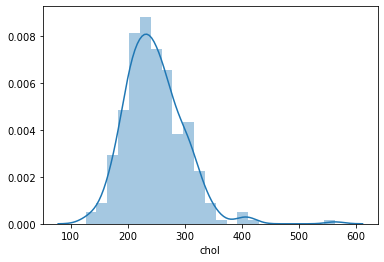

In [215]:
import seaborn as sns

sns.distplot(df.chol)

**This dataset was not suitable for regression task since it poorly performed. Alternatively, we can classifiy cholesteron in three classes according to medical practices such as Normal (<200 mg/dL), Slightly risk (200 - 239 mg/dL), high risk ( >=240 mg/dL)** Please see this website for for more information on classification. http://www.scymed.com/en/smnxdj/edzr/edzr9610.htm

In [216]:
# Convert target variable into categorical variable under three class as above. Normal =0, slightly risk=1, and high risk =2

def phanloai(a):
    mlist=[]
    for i in a:
        if i<200:
            mlist.append(0)
        elif 200<=i<=239:
            mlist.append(1)
        else:
            mlist.append(2)
    return mlist
        
mlist=phanloai(df.chol)

y_class=pd.Series(mlist)

### Building classification model with three classes

In [217]:
# Create a list storing all six following models
models =[LogisticRegression(multi_class="multinomial", solver="lbfgs"), DecisionTreeClassifier(), GaussianNB(), SVC(kernel="rbf"), 
         RandomForestClassifier(n_estimators=200),KNeighborsClassifier(n_neighbors=5)]
# Create a empty list to store values from following iterations
container=[]
# Loop over each model and randomly split dataset 10 times
for model in models:
    testScore=[] # Test accuracy 
    trainScore=[]
    absScore=[]
    for i in range(20):
        X_train, X_test, y_train, y_test=train_test_split(X,y_class, test_size=0.25, random_state=i)
        model.fit(X_train, y_train)
        modelName=model.__class__.__name__
        y_pred=model.predict(X_test)
        y_train_pred=model.predict(X_train)
        test_score=accuracy_score(y_test,y_pred)
        train_score=accuracy_score(y_train,y_train_pred)
        abs_score=abs(test_score-train_score)
        # Append test_score and train_score, abs_score to testScore, trainScore and absScore
        testScore.append(test_score)
        trainScore.append(train_score)
        absScore.append(abs_score)
    container.append([modelName, np.array(testScore).mean()*100, np.array(trainScore).mean()*100, np.array(absScore).mean()*100])

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

In [218]:
# Create a dataframe storing model name, train and test accuracy score, etc.
df_score=pd.DataFrame(container, columns=["Model_Name","Test_Score","Train_Score","Train_Test_Difference"])
df_score

,Model_Name,Test_Score,Train_Score,Train_Test_Difference
0,LogisticRegression,49.210526,55.660793,8.155576
1,DecisionTreeClassifier,37.500000,100.000000,62.500000
2,GaussianNB,35.657895,42.290749,7.377695
3,SVC,51.907895,51.343612,5.753246
4,RandomForestClassifier,45.592105,100.000000,54.407895
5,KNeighborsClassifier,42.828947,61.123348,18.294401


**Comments**: Looking at the table above, it is observed that SVC provided the "best" test accuracy with least difference in training and test accuracies. Hence, this model is chosen for further improvement for this dataset although overall it is not fitted dataset well.

#### Feature Selection for this dataset

In [264]:
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2

bestFeat=SelectKBest(score_func=chi2, k="all")
bestFeat.fit(X,y_class)

SelectKBest(k='all', score_func=<function chi2 at 0x0000029038829820>)

In [265]:
df_bestFeat=pd.DataFrame({"Feature": X.columns,"Score":bestFeat.scores_})
df_bestFeat.sort_values(by=["Score"], inplace=True)
df_bestFeat

,Feature,Score
12,fbs_0,0.056057
22,thal_3,0.078512
24,thal_7,0.115089
15,restecg_1,0.261185
20,slope_2,0.273405
13,fbs_1,0.321394
19,slope_1,0.337824
3,oldpeak,0.457895
10,cp_3,0.828621
11,cp_4,0.983800


In [293]:
# Select only variables with score>=1

listFeat=[df_bestFeat.Feature[x] for x in range(len(df_bestFeat)) if df_bestFeat.Score[x]>=5.0]

In [294]:
X_new=X[listFeat]
y_class=y_class

In [295]:
# Build SVC 
X_train, X_test, y_train, y_test=train_test_split(X_new, y_class, random_state=42)

In [296]:
svcModel=SVC(kernel="rbf")
svcModel.fit(X_train,y_train)
y_pred=svcModel.predict(X_test)

In [297]:
# Check test and train accuracy
testScore=svcModel.score(X_test,y_test)
trainScore=svcModel.score(X_train, y_train)

print("Overall Test accuracy is {:.4} % and Overall Train accuracy is {:.3} %".format(testScore*100, trainScore*100))

Overall Test accuracy is 50.0 % and Overall Train accuracy is 52.0 %


In [ ]:
# Create a list storing all six following models
models =[LogisticRegression(multi_class="multinomial", solver="lbfgs"), DecisionTreeClassifier(), GaussianNB(), SVC(kernel="rbf"), 
         RandomForestClassifier(n_estimators=200),KNeighborsClassifier(n_neighbors=5)]
# Create a empty list to store values from following iterations
container=[]
# Loop over each model and randomly split dataset 10 times
for model in models:
    testScore=[] # Test accuracy 
    trainScore=[]
    absScore=[]
    for i in range(20):
        X_train, X_test, y_train, y_test=train_test_split(X_new,y_class, test_size=0.25, random_state=i)
        model.fit(X_train, y_train)
        modelName=model.__class__.__name__
        y_pred=model.predict(X_test)
        y_train_pred=model.predict(X_train)
        test_score=accuracy_score(y_test,y_pred)
        train_score=accuracy_score(y_train,y_train_pred)
        abs_score=abs(test_score-train_score)
        # Append test_score and train_score, abs_score to testScore, trainScore and absScore
        testScore.append(test_score)
        trainScore.append(train_score)
        absScore.append(abs_score)
    container.append([modelName, np.array(testScore).mean()*100, np.array(trainScore).mean()*100, np.array(absScore).mean()*100])
    # Create a dataframe storing model name, train and test accuracy score, etc.


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

In [ ]:
df_score=pd.DataFrame(container, columns=["Model_Name","Test_Score","Train_Score","Train_Test_Difference"])
df_score